<Axes: xlabel='Hour of the day', ylabel='Win ratio'>

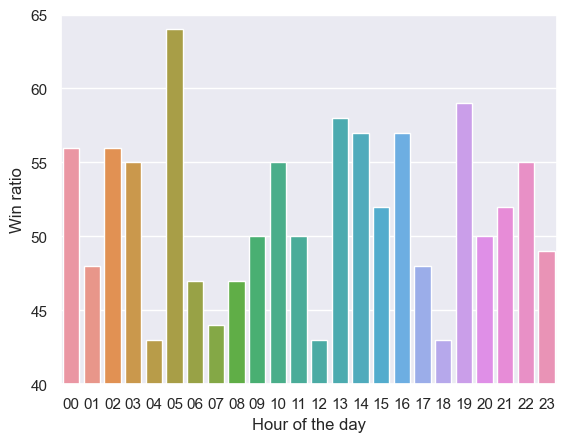

In [143]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
with open('test_data.json') as jsonfile:
    data = json.load(jsonfile)

def get_graph_hour_winratio(data):
    df = pd.DataFrame(data, columns=['match_id','type','max_players','startdate','enddate','result'])
    df['avg_time'] = (df['startdate']+df['enddate'])/2
    df['hour'] = df['avg_time'].apply(lambda cell : unix_to_utc_hour(cell))
    df = df[['result', 'hour']].groupby('hour').mean()
    df['win_ratio'] = df['result'].apply(lambda cell : num_to_win_ratio(cell))

    graph = sns.barplot(data=df, x=df.index, y=df['win_ratio'])
    plt.ylim(40, 65)
    graph.set(xlabel='Hour of the day', ylabel='Win ratio')

    return graph

def unix_to_utc_hour(unix_time):
  return datetime.utcfromtimestamp(unix_time).strftime('%H')

def num_to_win_ratio(num):
  return round(num*100)

lel = get_graph_hour_winratio(data)
lel

#interpretation -> morning,afternoon,evening,night 6-12/12-18/18-24/24-6

In [92]:
def day_of_the_week(unix_time):
    return datetime.utcfromtimestamp(unix_time).weekday()

day_of_the_week(1665605845)    

2